<a href="https://colab.research.google.com/github/JeevanandaReddy/Resume_Projects/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction by K Nearest Neighbours (KNN)

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing dataset

In [ ]:
data_set= pd.read_csv("Loan Distribution KNN.csv")

In [ ]:
x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values

## Splitting the dataset into Training & Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 21)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

## KNN Training on Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors= 5, metric= "minkowski", p= 2)

In [ ]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Predicting

In [ ]:
print(classifier.predict(sc.transform([[1, 735]])))

[1]


## Predicting Test set results

In [ ]:
y_pred= classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  3]
 [ 1 27]]


0.9411764705882353

## Visualizing Test Set results

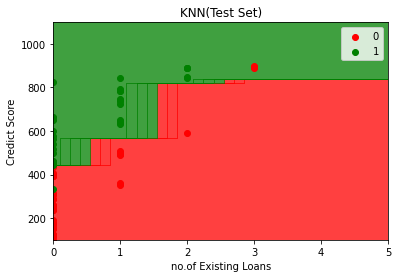

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set= sc.inverse_transform(x_test), y_test
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min()- 0, stop= x_set[:, 0].max()+ 3, step= 1),
                    np.arange(start= x_set[:, 1].min()- 0, stop= x_set[:, ].max()+ 200, step= 1))

plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c= ListedColormap(('red', 'green'))(i), label= j)
plt.title("KNN(Test Set)")
plt.xlabel("no.of Existing Loans")
plt.ylabel("Credict Score")
plt.legend()
plt.show()

## Visualising Training set results

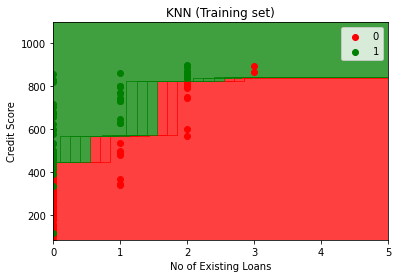

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 3, step = 1),
                     np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 200, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()